In [1]:
import strym
from strym import strymread
import matplotlib.pyplot as plt
import pandas as pd

Loading BokehJS ...

In [2]:
dbcfile = '/home/ivory/VersionControl/Jmscslgroup/strym/examples/newToyotacode.dbc'

In [3]:
r =strymread(csvfile="/home/ivory/CyverseData/JmscslgroupData/PandaData/2020_02_18/2020-02-18-13-00-42-209119__CAN_Messages.csv", dbcfile=dbcfile)

In [4]:
r.dataframe

,Time,Buffer,Bus,MessageID,Message,MessageLength
Clock,,,,,,
2020-02-18 20:00:42.490136623,1.582056e+09,0000e03118005a98f40bce03400010b8,1,399,f40bce03400010b8,8
2020-02-18 20:00:42.490611315,1.582056e+09,000000321800d398f40000000694587f,1,400,f40000000694587f,8
2020-02-18 20:00:42.491990089,1.582056e+09,000060321800429cf400020006845874,1,403,f400020006845874,8
2020-02-18 20:00:42.492338181,1.582056e+09,000080321800ba9cf404000006845877,1,404,f404000006845877,8
2020-02-18 20:00:42.493942976,1.582056e+09,000040150800e6481a6f1a6f1a6f1a6f,0,170,1a6f1a6f1a6f1a6f,8
...,...,...,...,...,...,...
2020-02-18 20:10:42.678352833,1.582057e+09,000040150800d9311fad204c1f9a2038,0,170,1fad204c1f9a2038,8
2020-02-18 20:10:42.678613424,1.582057e+09,0000401704004f3201f320d2007fffff,0,186,01f320d2,4
2020-02-18 20:10:42.678887606,1.582057e+09,000080040800aa3201bf01f241de807e,0,36,01bf01f241de807e,8


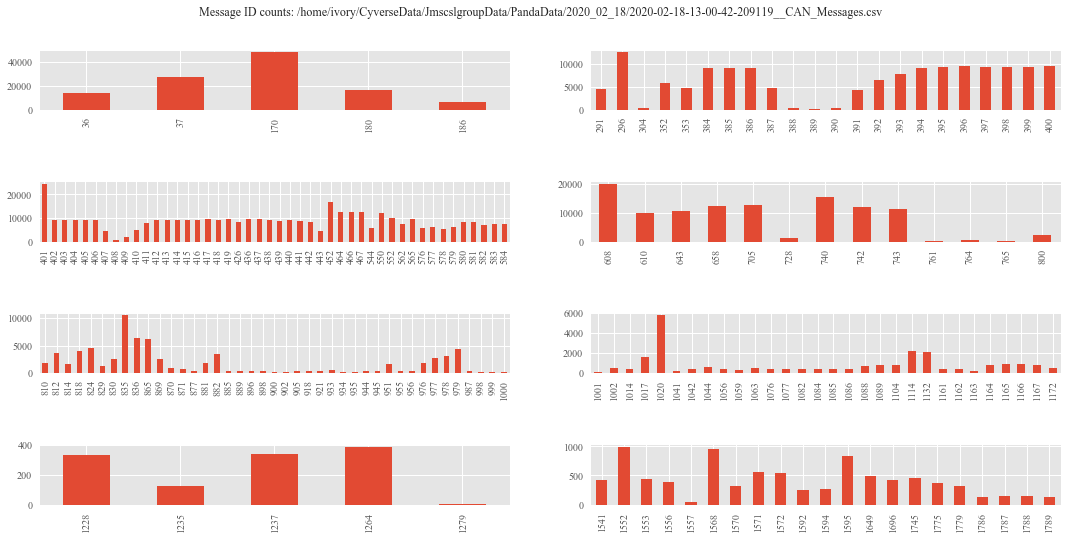

In [5]:
plt.rcParams["figure.figsize"] = (24,12)
r.count()

In [6]:
msg869 = r.get_ts(869, 6)

In [7]:
msg869

,Time,Message
Clock,,
2020-02-18 20:00:42.563222170,1.582056e+09,252
2020-02-18 20:00:42.762883186,1.582056e+09,252
2020-02-18 20:00:42.962881088,1.582056e+09,252
2020-02-18 20:00:43.163354397,1.582056e+09,252
2020-02-18 20:00:43.362929344,1.582056e+09,252
...,...,...
2020-02-18 20:10:41.780860662,1.582057e+09,252
2020-02-18 20:10:41.981138706,1.582057e+09,252
2020-02-18 20:10:42.180863142,1.582057e+09,252


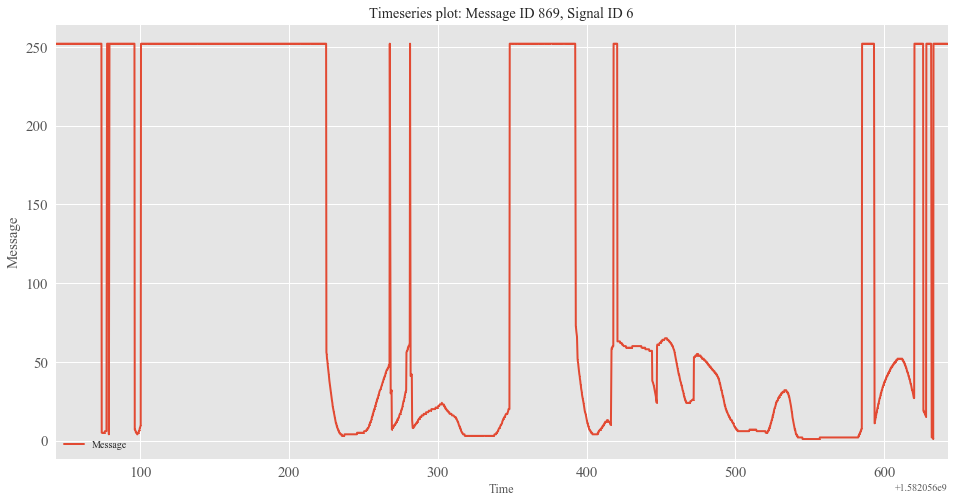

In [8]:
strym.plt_ts(msg869, title='Message ID 869, Signal ID 6')

In [9]:
speed = r.speed()

In [10]:
speed

,Time,Message
Clock,,
2020-02-18 20:00:42.514189243,1.582056e+09,0.00
2020-02-18 20:00:42.554264784,1.582056e+09,0.00
2020-02-18 20:00:42.574315548,1.582056e+09,0.00
2020-02-18 20:00:42.654326677,1.582056e+09,0.00
2020-02-18 20:00:42.674211502,1.582056e+09,0.00
...,...,...
2020-02-18 20:10:42.528868436,1.582057e+09,14.18
2020-02-18 20:10:42.568802834,1.582057e+09,14.18
2020-02-18 20:10:42.588772535,1.582057e+09,14.18


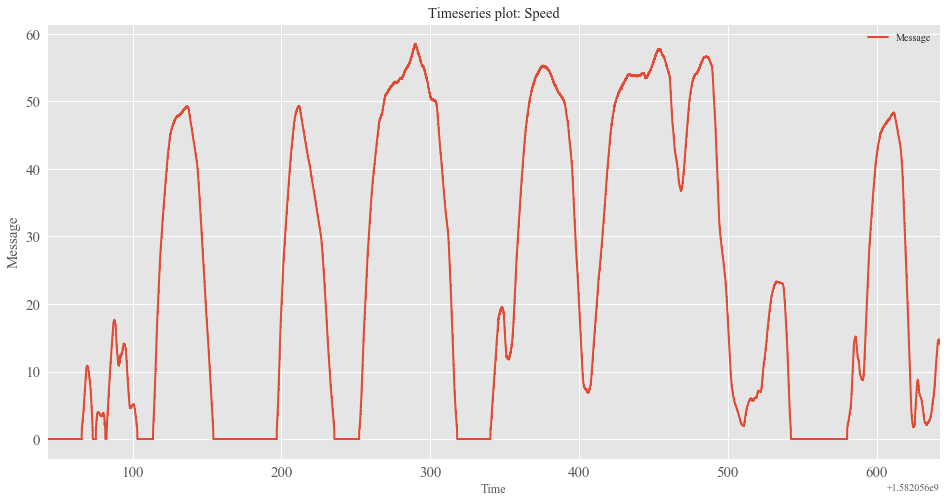

In [11]:
strym.plt_ts(speed, title='Speed')

In [12]:
ts_yaw_rate = r.yaw_rate()
ts_speed = r.speed()

# integrate yaw rate to get the heading
ts_yaw = strym.integrate(ts_yaw_rate)

In [13]:
interpolated_speed, interpolated_yaw = strym.ts_sync(ts_speed, ts_yaw, rate=10)

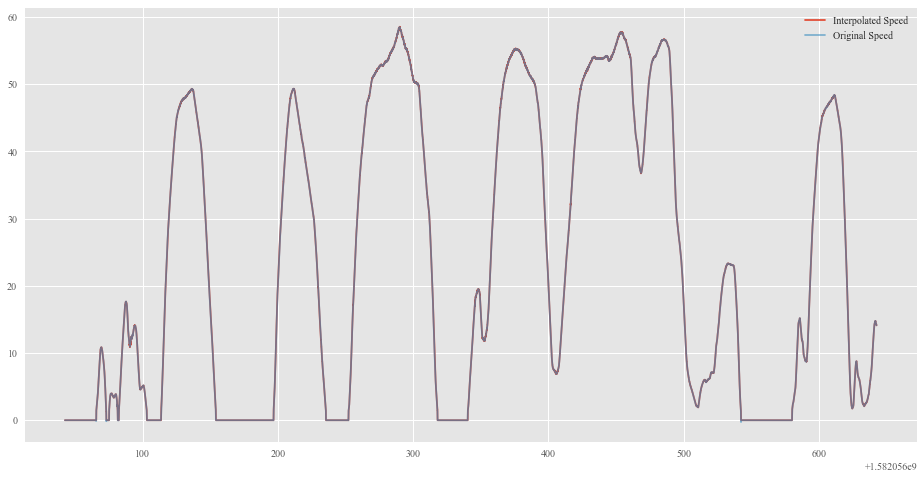

In [14]:
plt.plot(ts_speed['Time'], ts_speed['Message'])
plt.plot(interpolated_speed['Time'], interpolated_speed['Message'], alpha = 0.6)

plt.legend(['Interpolated Speed', 'Original Speed'])

In [15]:
interpolated_speed.shape

(6001, 2)

In [16]:
ts_speed.shape

(16463, 2)

In [17]:
t = r.trajectory()

In [18]:
t

,Time,X,Y,Vx,Vy
0,1.582056e+09,0.000000,0.000000,0.000000,0.000000
1,1.582056e+09,0.000000,0.000000,0.000000,0.000000
2,1.582056e+09,0.000000,0.000000,0.000000,0.000000
3,1.582056e+09,0.000000,0.000000,0.000000,0.000000
4,1.582056e+09,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
30003,1.582057e+09,-204.686166,42.479104,3.066396,-2.472277
30004,1.582057e+09,-204.625252,42.429369,3.045672,-2.486786
30005,1.582057e+09,-204.564762,42.379424,3.024500,-2.497260
30006,1.582057e+09,-204.504550,42.329317,3.010605,-2.505321


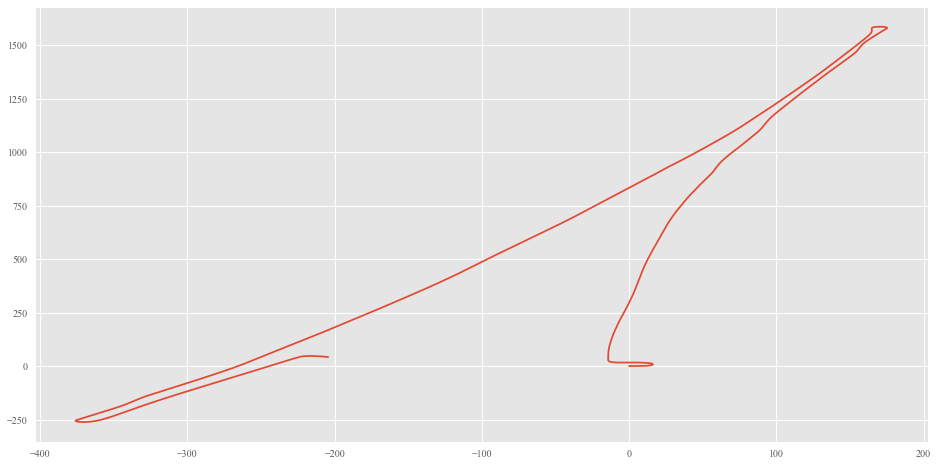

In [19]:
plt.plot(t['X'], t['Y'])

Analyzing Timestamp and Data Rate of Timeseries
Interquartile Range of Rate for Timeseries is 25.053590492276665 


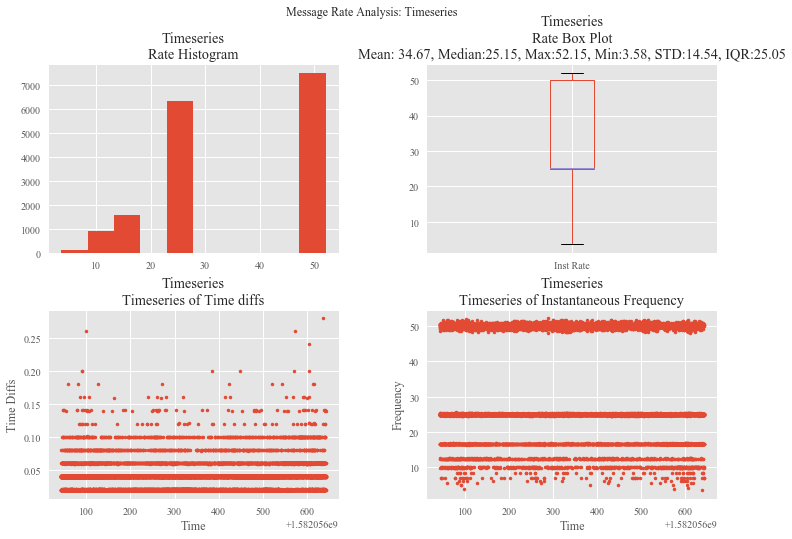

In [20]:
strym.ranalyze(ts_speed)

In [21]:
interpolated_yaw

,Time,Message
0,1.582056e+09,0.000000
1,1.582056e+09,0.000000
2,1.582056e+09,0.000000
3,1.582056e+09,0.000000
4,1.582056e+09,0.000000
...,...,...
5996,1.582057e+09,325.912504
5997,1.582057e+09,324.521085
5998,1.582057e+09,323.020876
5999,1.582057e+09,321.464918
